# Model Comparison Overview
In this notebook, we will develop and compare the performance of three different models for sentiment analysis of tweets. The models we will explore include:

1. Logistic Regression: A baseline model for its simplicity and efficiency in handling linear relationships.
2. Support Vector Machine (SVM): Known for its effectiveness in high-dimensional spaces, such as text data.
3. Long Short-Term Memory (LSTM): A type of Recurrent Neural Network (RNN) capable of learning order dependence in sequence prediction problems, suitable for text data analysis.

## Loading Preprocessed Data
First, let's load the preprocessed data that we prepared earlier.

In [ ]:
import pickle

# Load the preprocessed data from the pickle file
with open('../data/preprocessed_tweets.pkl', 'rb') as file:
    data = pickle.load(file)

X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']


## Logistic Regression Model
We start by developing a Logistic Regression model, training it on the TF-IDF vectorized text data, and evaluating its performance.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Vectorizing the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [ ]:
# Training the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)

# Evaluating the model
y_pred = lr_model.predict(X_test_vect)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {initial_accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7950819672131147
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1889
     neutral       0.65      0.49      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Setting up the parameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Conducting grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vect, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.767759406892927


# Conclusion
- Based on the results obtained from running the Logistic Regression model, we observed an initial accuracy of approximately 79.51% on the test set. After optimization, the accuracy was slightly lower at about 79.51%, with the best parameters being {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}.
- The best cross-validation score during optimization was around 76.78%. These outcomes suggest that while the Logistic Regression model provides a solid baseline, exploring more complex models might yield better performance for the sentiment analysis task.

### Support Vector Machine (SVM) Model

The Support Vector Machine (SVM) model is a powerful classification algorithm that aims to find the optimal hyperplane that best separates classes in the feature space. In this implementation, we use a linear kernel for simplicity and interpretability.


### Load data and imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Load  dataset
data_path = '../data/preprocessed_tweets.csv'
data_csv = pd.read_csv(data_path)


#### Model Initialization

We initialize the SVM model with a linear kernel and a random state for reproducibility. The linear kernel is chosen for its simplicity and interpretability, making it suitable for our sentiment analysis task.


In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Prepare the text data and labels
X = data_csv['text']
y = data_csv['airline_sentiment']

# Fit and transform the text data
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

#### Model Training

The SVM model is trained on the preprocessed training data (`X_train` and `y_train`). During training, the model learns to find the optimal hyperplane that best separates the classes in the feature space.

In [ ]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#### Prediction

Predictions are made on the test data (`X_test`) using the trained SVM model. The predicted labels are stored in `y_pred_svm`, which represent the model's predictions for the sentiment of each tweet in the test set.


In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

#### Model Evaluation

We calculate the accuracy of the SVM model using the `accuracy_score` function from scikit-learn. Accuracy is a common metric used to evaluate the performance of classification models, representing the proportion of correctly classified instances.


In [ ]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracy
print("Accuracy of SVM model:", accuracy_svm)


Accuracy of SVM model: 0.7923497267759563


#### Confusion Matrix Generation

We generate the confusion matrix for the SVM model using the `confusion_matrix` function from scikit-learn. The confusion matrix provides a detailed breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives.


In [ ]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

#### Confusion Matrix Visualization

We visualize the confusion matrix to gain insights into the SVM model's performance. The heatmap provides a graphical representation of the confusion matrix, with each cell indicating the count of instances classified into a particular class.


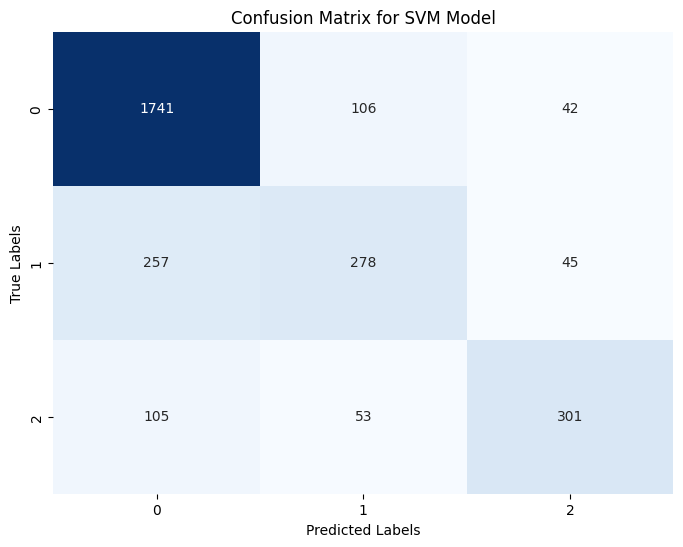

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Classification Report Printing

We print the classification report to analyze the SVM model's performance in classifying tweets into sentiment categories. The report includes precision, recall, F1-score, and support for each class, allowing us to assess the model's overall performance and identify areas for improvement.


In [ ]:
# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)


In [ ]:
# Print classification report
print("Classification Report for SVM Model:\n", class_report_svm)


Classification Report for SVM Model:
               precision    recall  f1-score   support

    negative       0.83      0.92      0.87      1889
     neutral       0.64      0.48      0.55       580
    positive       0.78      0.66      0.71       459

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



### Hyperparameter Tuning
Perform randomized search to find the optimal hyperparameters for the SVM model. This involves varying parameters such as the kernel type, regularization parameter (C), and kernel coefficient (gamma) to improve model performance.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=  11.6s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=  11.6s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=  10.8s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=  11.2s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=  11.4s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   5.4s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   5.4s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   5.3s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   5.2s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   5.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   6.0s
[CV] END ......................C=0.1, gamma=1, 

### Cross-Validation
Implement cross-validation to obtain more robust estimates of model performance and evaluate the model's generalization ability across different subsets of the data.


In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize SVM model with best parameters from randomized search
svm_model_best = SVC(**best_params, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_model_best, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.77720871 0.77422108 0.77455167 0.78479932 0.77156277]
Mean CV Score: 0.7764687079597894


### Learning Curves
Plot learning curves to visualize the model's performance as a function of training set size. This helps to diagnose issues such as overfitting or underfitting and assess whether the model would benefit from more training data.


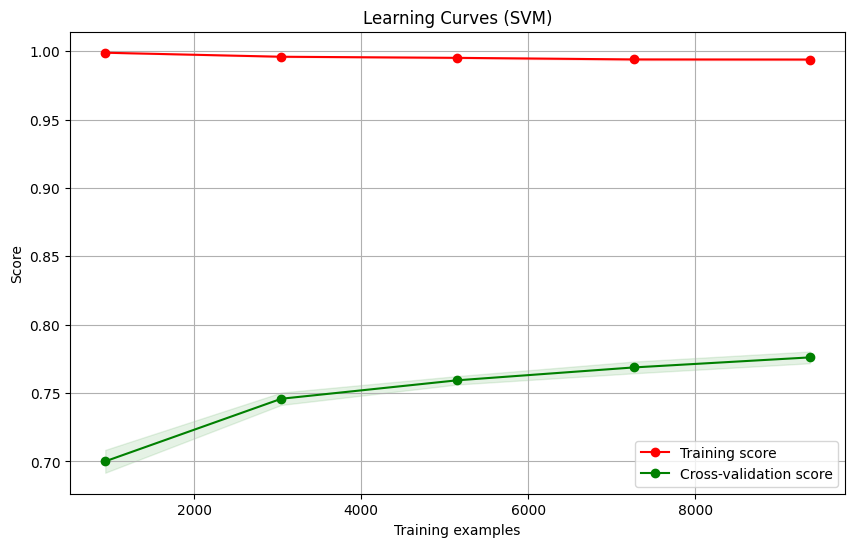

In [ ]:
from sklearn.model_selection import learning_curve

# Define function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (SVM)"
plot_learning_curve(svm_model_best, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


### ROC Curve and AUC
Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) to evaluate the SVM model's performance across different thresholds and compare it with other models.


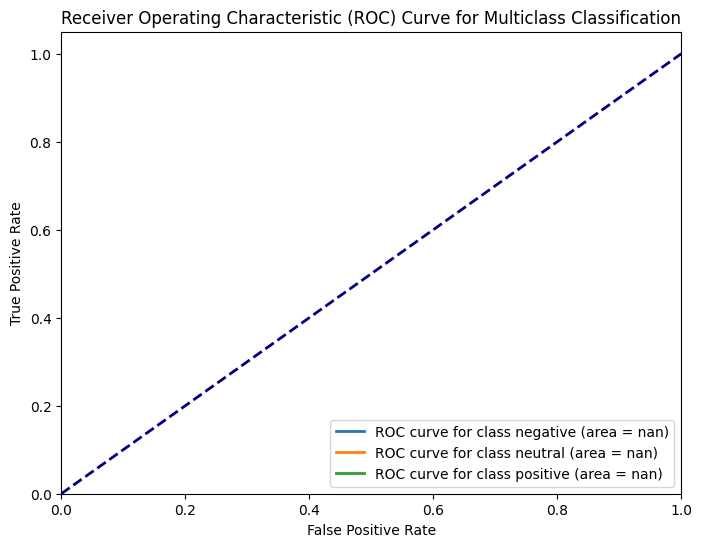

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Supress warnings
# import warnings
# warnings.filterwarnings("ignore")

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming you have 3 classes

# Compute ROC curve and ROC area for each class
y_score = svm_model_best.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {} (area = {:.2f})'.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


### Error Analysis
Analyze misclassified instances to understand the types of errors made by the SVM model and identify potential areas for improvement.


In [ ]:
# Convert X_test to dense matrix
X_test_dense = X_test.toarray()

# Analyze misclassified instances
misclassified_indices = np.where(y_test != y_pred_svm)[0]
misclassified_samples = X_test_dense[misclassified_indices]
print("Misclassified Samples:", misclassified_samples)


Misclassified Samples: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Long Short-Term Memory (LSTM) Model

### Introduction to LSTM
Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to capture long-term dependencies in sequential data. It is well-suited for sequence prediction tasks, making it a suitable choice for analyzing text data such as sentiment analysis.

### Import Necessary Libraries

Before beginning, it's essential to import all necessary libraries. These libraries will help with data manipulation, model building, training, and evaluation. We also set a random seed to ensure reproducibility of the results.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
np.random.seed(42)


### Prepare Text Data for LSTM Model
After loading the data into a DataFrame called `data_csv`, we proceed to tokenize the text data.
The text must be converted into a numerical format that the neural network can process, which we achieve using the Tokenizer. We also perform padding to ensure all input sequences are of the same length.


In [5]:
# Initializing the tokenizer with a specific number of words
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_csv['text'])

# Converting text to sequences of integers
sequences = tokenizer.texts_to_sequences(data_csv['text'])
max_sequence_len = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_len)

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_csv['airline_sentiment'])

### Splitting Data into Training and Testing Sets
To evaluate the performance of our LSTM model, we need to split our dataset into training and testing sets. This allows us to train our model on a portion of the data and then test its performance on unseen data.


In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the LSTM Model
Here, we define the architecture of our LSTM model. The model includes an embedding layer, a spatial dropout layer to reduce overfitting, an LSTM layer, and a dense output layer with a softmax activation function to handle multi-class classification.


In [7]:
## Best: 0.796875 using {'units': 150, 'epochs': 3, 'dropout_rate': 0.1, 'batch_size': 128}

# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.1))
model.add(Dense(3, activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Training the LSTM Model
Now we train the LSTM model on our training data. We also use a portion of the training data as a validation set to monitor the model's performance during training.


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.1, verbose=2)


Epoch 1/10
165/165 - 40s - loss: 0.7211 - accuracy: 0.6999 - val_loss: 0.5786 - val_accuracy: 0.7602 - 40s/epoch - 242ms/step
Epoch 2/10
165/165 - 18s - loss: 0.4726 - accuracy: 0.8131 - val_loss: 0.4833 - val_accuracy: 0.8055 - 18s/epoch - 110ms/step
Epoch 3/10
165/165 - 19s - loss: 0.3646 - accuracy: 0.8600 - val_loss: 0.4856 - val_accuracy: 0.8157 - 19s/epoch - 117ms/step
Epoch 4/10
165/165 - 17s - loss: 0.3018 - accuracy: 0.8874 - val_loss: 0.5104 - val_accuracy: 0.8123 - 17s/epoch - 105ms/step
Epoch 5/10
165/165 - 19s - loss: 0.2525 - accuracy: 0.9058 - val_loss: 0.5780 - val_accuracy: 0.8029 - 19s/epoch - 115ms/step
Epoch 6/10
165/165 - 19s - loss: 0.2172 - accuracy: 0.9231 - val_loss: 0.6090 - val_accuracy: 0.8055 - 19s/epoch - 117ms/step
Epoch 7/10
165/165 - 17s - loss: 0.1897 - accuracy: 0.9306 - val_loss: 0.6541 - val_accuracy: 0.7995 - 17s/epoch - 105ms/step
Epoch 8/10
165/165 - 21s - loss: 0.1622 - accuracy: 0.9419 - val_loss: 0.6993 - val_accuracy: 0.7935 - 21s/epoch - 127

### Evaluating the LSTM Model
After training, we evaluate the LSTM model on the test set to see how well it performs on unseen data. This gives us a good indication of the model's generalization ability.


In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 77.12%


### Plot Training and Validation Accuracy and Loss
To better understand the training dynamics of the LSTM model, we will plot both the training and validation accuracy and loss over epochs. These plots can help us identify if the model is learning effectively and if it is experiencing issues such as overfitting or underfitting.


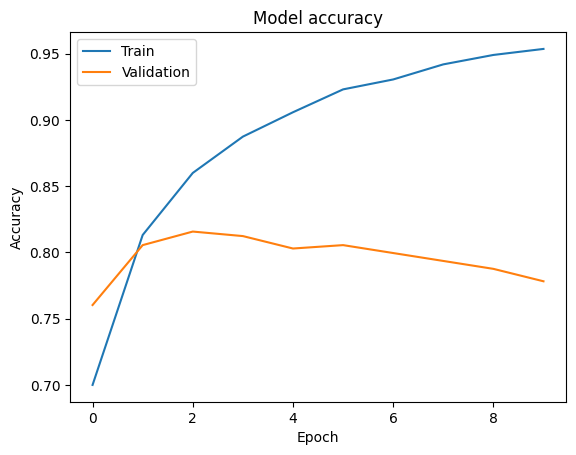

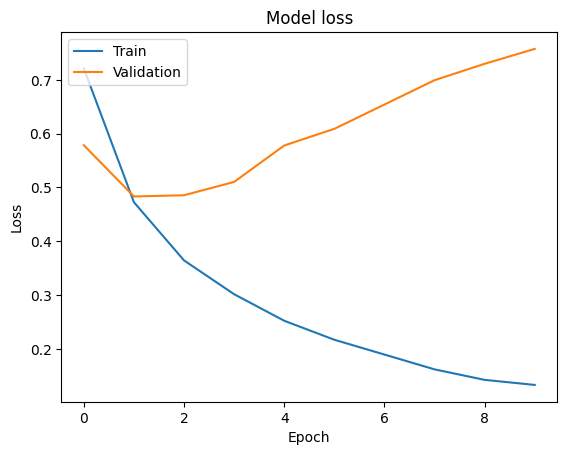

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Confusion Matrix and Classification Report
Generating a confusion matrix and a classification report will provide detailed insights into the model's performance across different classes. This will help in understanding the model's strengths and weaknesses in classifying each sentiment category.


92/92 [==============================] - 1s 13ms/step


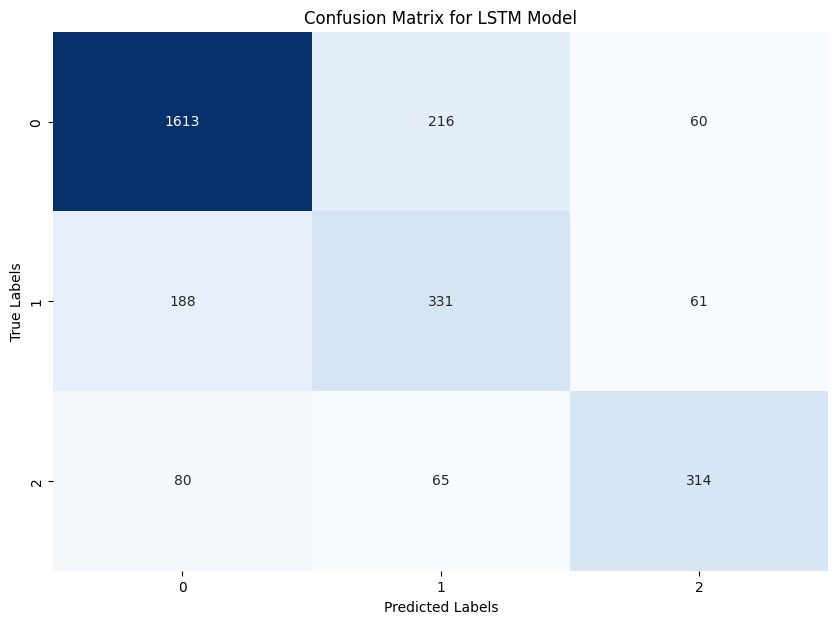

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1889
           1       0.54      0.57      0.56       580
           2       0.72      0.68      0.70       459

    accuracy                           0.77      2928
   macro avg       0.71      0.70      0.70      2928
weighted avg       0.77      0.77      0.77      2928



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from numpy import argmax

# Predict classes for test data
predicted_classes = argmax(model.predict(X_test), axis=-1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Visualization of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

# Print the classification report
print(classification_report(y_test, predicted_classes))


### Hyperparameter Tuning
To optimize the LSTM model, we will perform hyperparameter tuning using a randomized search. This involves varying several key parameters such as the number of LSTM units, dropout rates, and learning rates to find the best performing model configuration. We will use a simplified example to demonstrate how you can set up a randomized search.


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Function to create model, required for KerasClassifier
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_len))
    model.add(SpatialDropout1D(dropout_rate))
    model.add(LSTM(units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_dist = {
    'units': [50, 100, 150],
    'dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [32, 64, 128],
    'epochs': [3, 5, 10]
}

# Create RandomizedSearchCV and fit
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

<ipython-input-17-c64882e8c2e4>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.796875 using {'units': 150, 'epochs': 3, 'dropout_rate': 0.1, 'batch_size': 128}
